### Dataset Preparation

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [3]:
# basic info
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)
print(f"Unique labels: {np.unique(y_train)}")

X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)
Unique labels: [0 1 2 3 4 5 6 7 8 9]


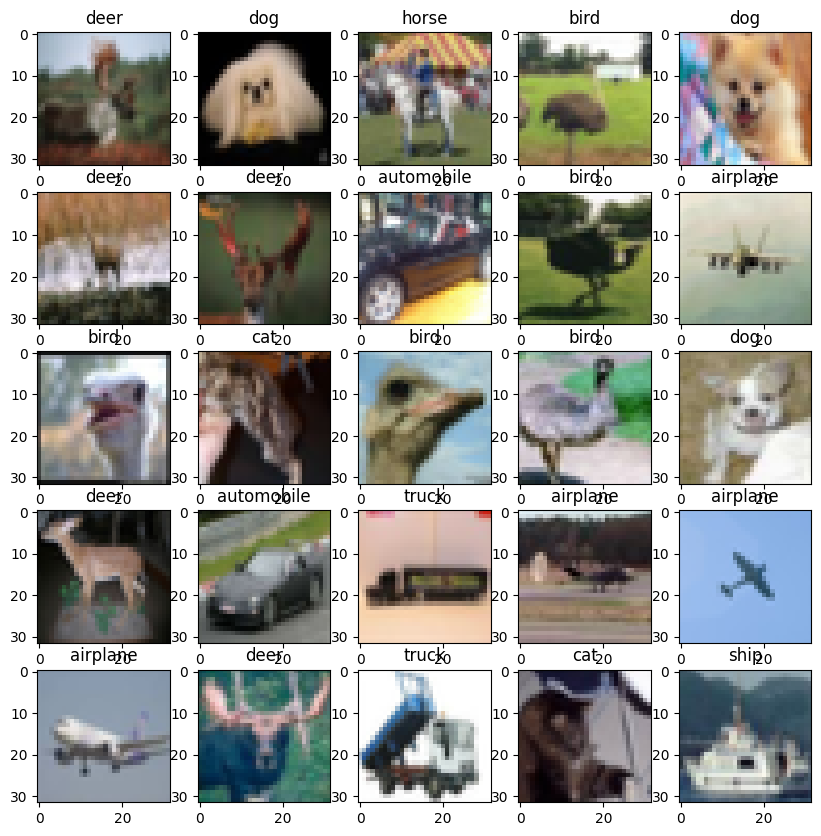

In [4]:
# display sample images from each class
fig, ax = plt.subplots(5, 5, figsize=(10, 10))
for i in range(5):
    for j in range(5):
        idx = np.random.randint(0, len(X_train))
        ax[i, j].set_title(classes[y_train[idx][0]])
        ax[i, j].imshow(X_train[idx])


In [5]:
# normalize data
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [6]:
# data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1
)

In [7]:
datagen.fit(X_train)

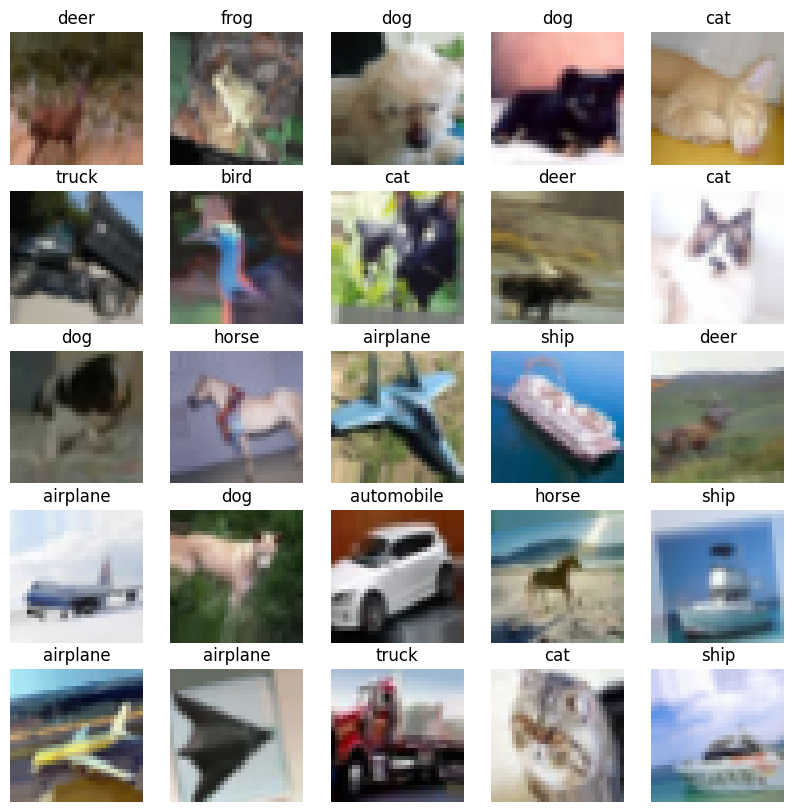

In [8]:
# show augmented images
fig, ax = plt.subplots(5, 5, figsize=(10, 10))
for i in range(5):
    for j in range(5):
        idx = np.random.randint(0, len(X_train))
        ax[i, j].set_title(classes[y_train[idx][0]])
        ax[i, j].imshow(X_train[idx])
        augmented_images = datagen.flow(X_train[idx].reshape(1, 32, 32, 3), batch_size=1)
        ax[i, j].imshow(augmented_images[0].reshape(32, 32, 3))
        ax[i, j].axis('off')

### Model Development

In [19]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential

In [ ]:
model = Sequential([
    # block-1
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.2),

    # block-2
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # fully connected block
    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(len(np.unique(y_train)), activation='softmax')

])


In [11]:
# model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,171,178 (8.28 MB)

 Trainable params: 2,169,770 (8.28 MB)

 Non-trainable params: 1,408 (5.50 KB)

### Model Training

In [12]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [13]:
# compile our model
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [14]:
# define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

In [15]:
# train the model using data
history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    epochs=30,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping, lr_reduce]
)

Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 52s 27ms/step - accuracy: 0.3838 - loss: 1.9233 - val_accuracy: 0.5722 - val_loss: 1.2231 - learning_rate: 0.0010
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 22ms/step - accuracy: 0.5681 - loss: 1.2092 - val_accuracy: 0.6086 - val_loss: 1.1498 - learning_rate: 0.0010
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.6257 - loss: 1.0606 - val_accuracy: 0.6485 - val_loss: 1.0483 - learning_rate: 0.0010
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.6590 - loss: 0.9683 - val_accuracy: 0.7000 - val_loss: 0.8807 - learning_rate: 0.0010
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 0.6682 - loss: 0.9421 - val_accuracy: 0.5166 - val_loss: 1.5375 - learning_rate: 0.0010
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 0.6848 - loss: 0.8967 - val_accuracy: 0.7479 - val_loss: 0.7010 - learning_rate: 0.0010
Epoch 7/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.7053 

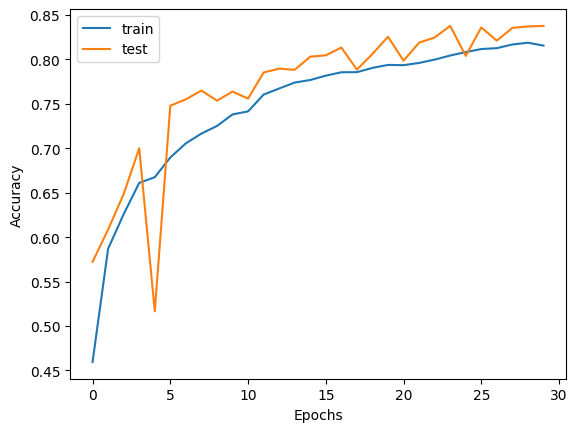

In [16]:
# visualize the model perfomance
# accuracy graphs from history
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

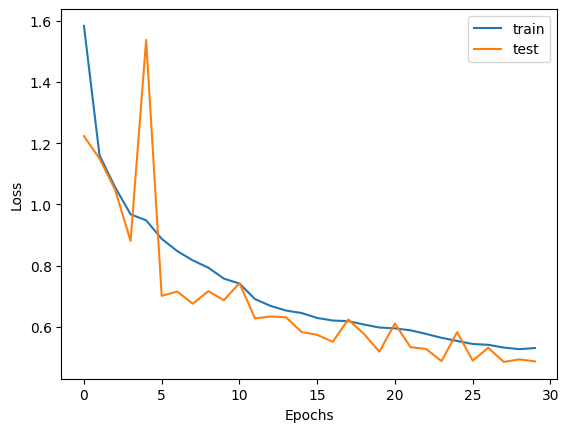

In [17]:
# loss graphs from history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Evaluation of the Model

In [18]:
from sklearn.metrics import confusion_matrix, classification_report

In [21]:
# predict on test data
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

In [22]:
y_pred

array([3, 8, 8, ..., 5, 1, 7])

In [23]:
# confustion Matix
cm = confusion_matrix(y_test, y_pred)

In [24]:
cm

array([[867,  17,  22,   2,   6,   0,  12,   4,  44,  26],
       [  1, 965,   0,   0,   0,   1,   0,   0,   3,  30],
       [ 34,   5, 766,  18,  40,  17,  89,  19,   3,   9],
       [ 15,  11,  43, 617,  49,  86, 124,  21,   7,  27],
       [  7,   1,  42,  10, 804,   2, 108,  21,   5,   0],
       [  8,   2,  38, 115,  38, 678,  75,  32,   3,  11],
       [  5,   2,  13,  10,   3,   2, 959,   2,   2,   2],
       [ 11,   2,  19,  13,  35,  12,  21, 876,   0,  11],
       [ 36,  25,   4,   2,   3,   0,   6,   1, 907,  16],
       [ 11,  57,   3,   2,   1,   0,   3,   1,   6, 916]])

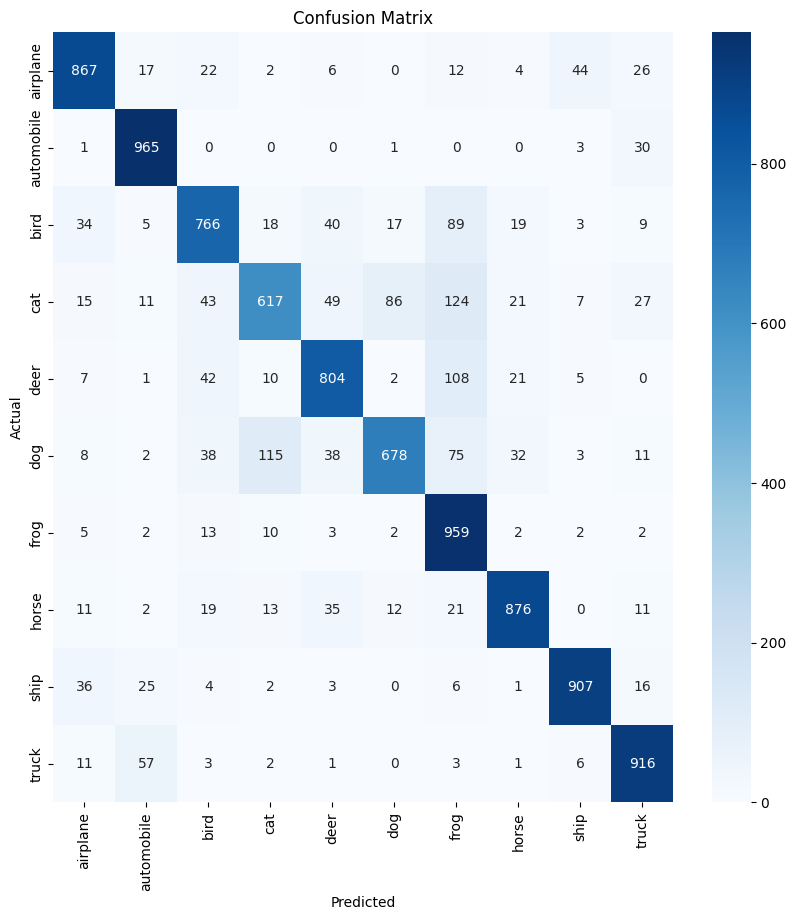

In [25]:
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [26]:
# classification report
print(classification_report(y_test, y_pred, target_names=classes))

              precision    recall  f1-score   support

    airplane       0.87      0.87      0.87      1000
  automobile       0.89      0.96      0.92      1000
        bird       0.81      0.77      0.79      1000
         cat       0.78      0.62      0.69      1000
        deer       0.82      0.80      0.81      1000
         dog       0.85      0.68      0.75      1000
        frog       0.69      0.96      0.80      1000
       horse       0.90      0.88      0.89      1000
        ship       0.93      0.91      0.92      1000
       truck       0.87      0.92      0.89      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.83     10000
weighted avg       0.84      0.84      0.83     10000



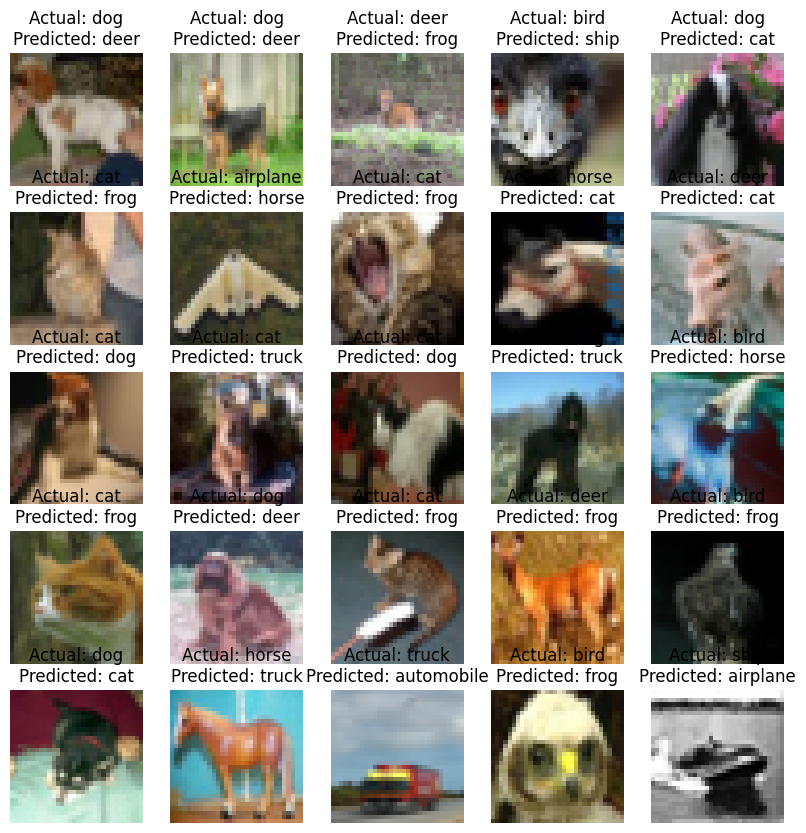

In [27]:
# show misclassified images
misclassified_idx = np.where(y_pred != y_test.flatten())[0]
plt.figure(figsize=(10, 10))
for i, idx in enumerate(misclassified_idx[:25]):
    plt.subplot(5, 5, i+1)
    plt.imshow(X_test[idx])
    plt.title(f"Actual: {classes[y_test[idx][0]]}\nPredicted: {classes[y_pred[idx]]}")
    plt.axis('off')
plt.show()

In [29]:
model.save('cifar10_model.keras')

### MNIST Fashion Dataset

In [4]:
import tensorflow_datasets as tfds

In [5]:
# list datasets
print(tfds.list_builders()[:10])

['abstract_reasoning', 'accentdb', 'aeslc', 'aflw2k3d', 'ag_news_subset', 'ai2_arc', 'ai2_arc_with_ir', 'ai2dcaption', 'aloha_mobile', 'amazon_us_reviews']


In [6]:
# load dataset
(ds_train, ds_test), ds_info = tfds.load('fashion_mnist', split=['train', 'test'], as_supervised=True, with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/incomplete.YVRFX5_3.0.1/fashion_mnist-train.tfrecord*...:   …

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/incomplete.YVRFX5_3.0.1/fashion_mnist-test.tfrecord*...:   0…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [7]:
ds_info

tfds.core.DatasetInfo(
    name='fashion_mnist',
    full_name='fashion_mnist/3.0.1',
    description="""
    Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.
    """,
    homepage='https://github.com/zalandoresearch/fashion-mnist',
    data_dir='/root/tensorflow_datasets/fashion_mnist/3.0.1',
    file_format=tfrecord,
    download_size=29.45 MiB,
    dataset_size=36.42 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    nondeterministic_order=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{DBLP:journals/corr

In [9]:
# preprocessing
def normalize_img(image, label):
    return tf.cast(image, tf.float32) / 255.0, label

In [10]:
ds_train = ds_train.map(normalize_img).batch(128).prefetch(tf.data.AUTOTUNE)
ds_test = ds_test.map(normalize_img).batch(128).prefetch(tf.data.AUTOTUNE)

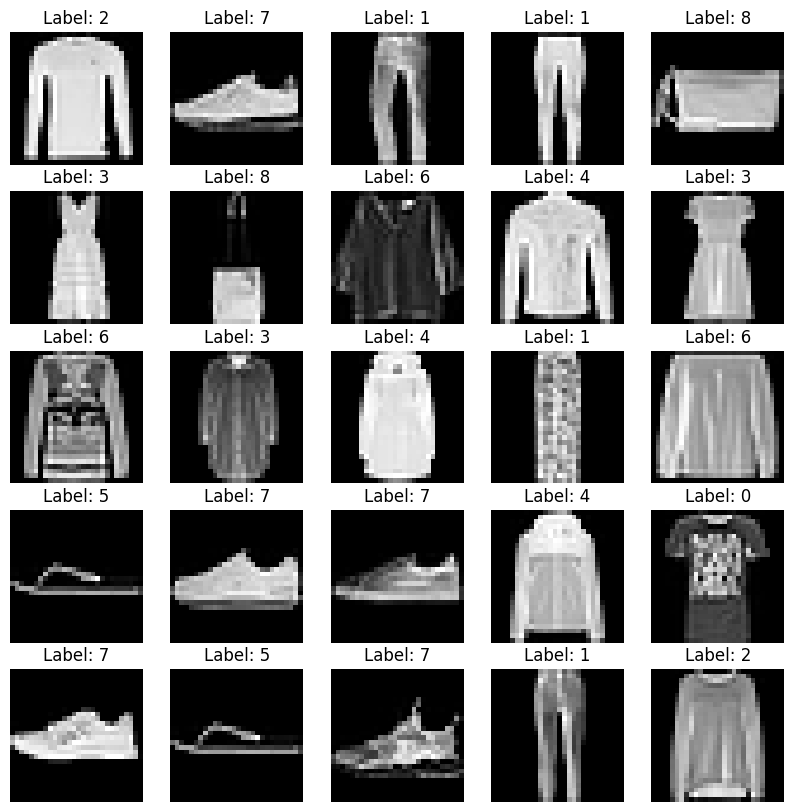

In [11]:
# visualize the samples
for images, labels in ds_train.take(1):
    fig, ax = plt.subplots(5, 5, figsize=(10, 10))
    for i in range(5):
        for j in range(5):
            idx = np.random.randint(0, 128)
            ax[i, j].imshow(images[idx].numpy().squeeze(), cmap='gray')
            ax[i, j].axis('off')
            ax[i, j].set_title(f"Label: {labels[idx].numpy()}")


In [12]:
# loss function and optimiser
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()

In [29]:
# metrics
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')
test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

### Custom Training Loop

In [17]:
classes = [labels for labels in ds_info.features['label'].names]

In [18]:
classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [21]:
model = Sequential([
    # block-1
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.2),

    # block-2
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # fully connected block
    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax')

])


In [22]:
# one epoch training step
@tf.function
def train_step(images, label):
    with tf.GradientTape() as tape:
        predictions = model(images, training=True)
        loss = loss_fn(label, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    train_loss.update_state(loss)
    train_accuracy.update_state(label, predictions)

In [23]:
@tf.function
def test_step(images, label):
    predictions = model(images, training=False)
    t_loss = loss_fn(label, predictions)

    test_loss.update_state(t_loss)
    test_accuracy.update_state(label, predictions)

In [25]:
import time
EPOCHS = 5

In [31]:
for epochs in range(EPOCHS):
    start = time.time()
    train_loss.reset_state()
    train_accuracy.reset_state()
    test_loss.reset_state()
    test_accuracy.reset_state()

    for images, labels in ds_train:
        train_step(images, labels)

    for images, labels in ds_test:
        test_step(images, labels)


    print(f"Epoch {epochs+1}, Time: {time.time() - start:.2f}s, ")
    print(f"Loss: {train_loss.result():.4f}, Accuracy: {train_accuracy.result() * 100:.2f}%")
    print(f"Test Loss: {test_loss.result():.4f}, Test Accuracy: {test_accuracy.result() * 100:.2f}%")


Epoch 1, Time: 21.76s, 
Loss: 0.4558, Accuracy: 84.21%
Test Loss: 0.7434, Test Accuracy: 74.21%
Epoch 2, Time: 7.74s, 
Loss: 0.2863, Accuracy: 89.65%
Test Loss: 0.2702, Test Accuracy: 90.65%
Epoch 3, Time: 8.04s, 
Loss: 0.2461, Accuracy: 91.09%
Test Loss: 0.2423, Test Accuracy: 91.40%
Epoch 4, Time: 8.00s, 
Loss: 0.2208, Accuracy: 91.95%
Test Loss: 0.2250, Test Accuracy: 91.86%
Epoch 5, Time: 10.55s, 
Loss: 0.2030, Accuracy: 92.59%
Test Loss: 0.2311, Test Accuracy: 92.03%


In [28]:
train_loss.reset_state()

In [38]:
!pip install fastapi uvicorn pyngrok -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 5.0 MB/s eta 0:00:00


In [40]:
!ngrok config add-authtoken 2wobr9gawXALOTFwg24ucbGc7aa_4vHAC6RNwf3p4MKTh3gF4

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


### Webserver using FastAPI

In [58]:
from fastapi import FastAPI, UploadFile, File
from fastapi.responses import JSONResponse
from tensorflow.keras.models import load_model
import uvicorn
from PIL import Image
import numpy as np
import io

In [59]:
app = FastAPI()
model = load_model('cifar10_model.keras')
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [66]:
def preprocess_image(image) -> np.ndarray:
    image = image.resize((32, 32)).convert('RGB')
    image = np.array(image)
    image = image.astype('float32') / 255.0
    image = np.expand_dims(image, axis=0)
    return image

In [46]:
!pip install python-multipart

In [64]:
@app.post("/predict")
async def predict(file: UploadFile = File(...)):
    contents = await file.read()
    image = Image.open(file.file)
    image = preprocess_image(image)
    prediction = model.predict(image)
    predicted_class = class_names[np.argmax(prediction)]
    return {"prediction" : predicted_class}

In [65]:
from pyngrok import ngrok
import nest_asyncio

ngrok_tunnel = ngrok.connect(8000)
print('Public URL:', ngrok_tunnel.public_url)
nest_asyncio.apply()
uvicorn.run(app, port=8000)

Public URL: https://ad6c-34-82-93-28.ngrok-free.app


INFO:     Started server process [379]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)


INFO:     106.51.176.135:0 - "GET /docs HTTP/1.1" 200 OK
INFO:     106.51.176.135:0 - "GET /openapi.json HTTP/1.1" 200 OK
INFO:     106.51.176.135:0 - "POST /predict HTTP/1.1" 400 Bad Request


INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [379]
